# VisCollage Study 1 Results Analysis

### Subjective Feedback - Challenges Ratings

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import os
from collections import defaultdict
from collections import OrderedDict
from statsmodels.stats.anova import AnovaRM
import pandas as pd
import json
import math

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [3]:
rst_study1 = pd.read_csv('VisCollage_Result-Study1.csv')

In [4]:
collage_labels = ['Collage_C1','Collage_C2','Collage_C3','Collage_C4','Collage_C5','Collage_C6','Collage_C7']
comics_labels = ['Comic_C1','Comic_C2','Comic_C3','Comic_C4','Comic_C5','Comic_C6','Comic_C7']
Rating_Counts = []
for i in range(1,8):
    tmp = {'Collage': [], 'Comics ': []}
    for s in range(1,8):
        tmp['Collage'].append(list(rst_study1[collage_labels[i-1]]).count(s))
        tmp['Comics '].append(list(rst_study1[comics_labels[i-1]]).count(s))
    Rating_Counts.append(tmp)

In [5]:
mean_confidence_interval(list(rst_study1[collage_labels[0]]))

(5.566666666666666, 5.099630097446628, 6.033703235886705)

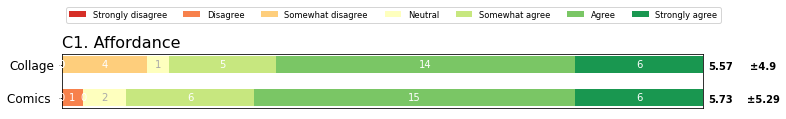

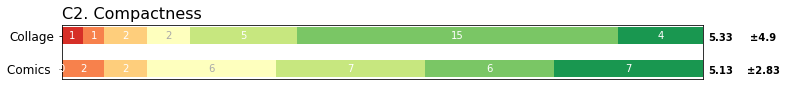

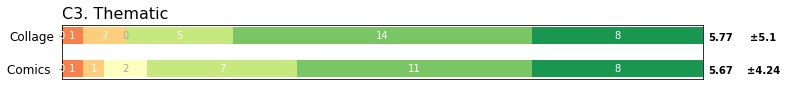

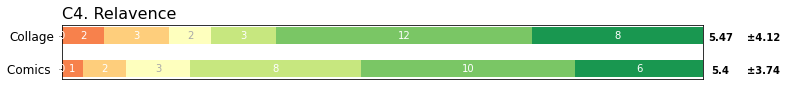

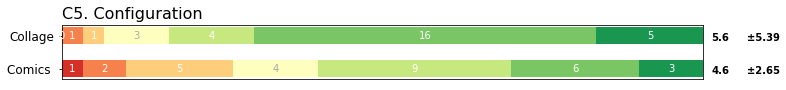

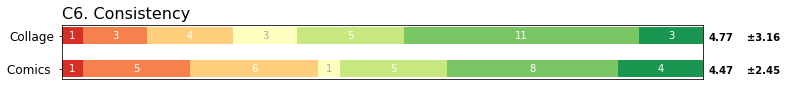

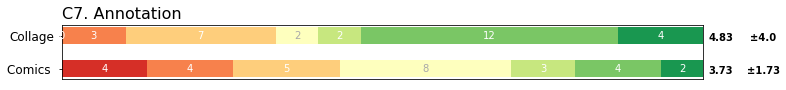

In [6]:

category_names = ['Strongly disagree', 'Disagree', 'Somewhat disagree',
                  'Neutral', 'Somewhat agree', 'Agree', 'Strongly agree']
challenges = ['C1. Affordance','C2. Compactness','C3. Thematic','C4. Relavence',
              'C5. Configuration','C6. Consistency','C7. Annotation']

def stackedBarSurvey(results, category_names, title):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.cm.get_cmap('RdYlGn')(np.linspace(0.1, 0.9, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11.5, 1))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
        
    
    # Average number text
    x_offset = 0.8
    for i, rating in enumerate(data):
        total = np.sum(rating)
        avg = round(np.inner(rating,[1,2,3,4,5,6,7])/total,2)
        stdev = round(statistics.stdev(rating),2)
        ax.text(total + x_offset, i+0.15, avg, ha='center',weight='bold')
        ax.text(total + x_offset + 2.0, i+0.15, "±"+str(stdev), ha='center',weight='bold')
    
    ax.tick_params(axis='y', labelsize='large')
    if title=='C1. Affordance':
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1.5), loc='lower left', fontsize='small')
    ax.set_title(title, loc='left', fontsize=16)

    return fig, ax

for i in range(len(Rating_Counts)):
    stackedBarSurvey(Rating_Counts[i], category_names, challenges[i])
    plt.show()

In [7]:
def checkNormal(data1, data2):
    print(data1)
    print(data2)
    s1, p1 = stats.normaltest(data1)
    s2, p2 = stats.normaltest(data2)

    print("k2 = {:g}, p = {:g}".format(s1, p1))
    print("k2 = {:g}, p = {:g}".format(s2, p2))
    
    if p1 < 1e-3:  # null hypothesis: x comes from a normal distribution
        print("Data1 is not normal distribution. The null hypothesis can be rejected.")
    else:
        print("Data1 is normal distribution. The null hypothesis cannot be rejected.")
    
    if p2 < 1e-3:  # null hypothesis: x comes from a normal distribution
        print("Data2 is not normal distribution. The null hypothesis can be rejected.")
    else:
        print("Data2 is normal distribution. The null hypothesis cannot be rejected.")

In [8]:
collage = list(rst_study1[collage_labels[0]])
comics = list(rst_study1[comics_labels[0]])

checkNormal(collage, comics)
print(stats.kruskal(collage,comics))
print(stats.f_oneway(collage,comics))

[6, 7, 3, 3, 6, 5, 6, 3, 6, 6, 7, 7, 6, 6, 5, 7, 3, 5, 6, 5, 4, 6, 6, 5, 7, 6, 6, 6, 6, 7]
[2, 7, 5, 6, 6, 6, 4, 7, 6, 6, 7, 6, 6, 6, 5, 7, 4, 6, 6, 6, 5, 6, 5, 5, 6, 7, 6, 6, 7, 5]
k2 = 5.45782, p = 0.0652903
k2 = 17.29, p = 0.000176008
Data1 is normal distribution. The null hypothesis cannot be rejected.
Data2 is not normal distribution. The null hypothesis can be rejected.
KruskalResult(statistic=0.11044890162370694, pvalue=0.7396336454068666)
F_onewayResult(statistic=0.3050063104753891, pvalue=0.5828828425160439)


In [23]:
def drawDistributionHist(collage, comics, fileName):

    fig,axs=plt.subplots(2,1,figsize=(4,1))
    counts, edges, bars, lower_q, higher_q = [None]*2, [None]*2, [None]*2, [None]*2, [None]*2
    counts[0], edges[0], bars[0] = axs[0].hist(collage,bins=range(1,9),color='#E9931C',align='left')
    counts[1], edges[1], bars[1] = axs[1].hist(comics,bins=range(1,9),color='#625E59',align='left')
    
    lower_q[0] = np.quantile(collage,0.25,interpolation='lower')
    lower_q[1] = np.quantile(comics,0.25,interpolation='lower')
    higher_q[0] = np.quantile(collage,0.75,interpolation='higher')
    higher_q[1] = np.quantile(comics,0.75,interpolation='higher')

    for i in range(2):
        axs[i].set_xticks(edges[i][:7])
        axs[i].set_yticks(range(20))
        axs[i].yaxis.set_visible(False)
        axs[i].tick_params(axis='x', colors='#505050')
        axs[i].xaxis.set_ticks_position('none')
        
        mean = sum(collage)/len(collage) if i == 0 else sum(comics)/len(comics)

        axs[i].axvspan(lower_q[i], higher_q[i], facecolor='#CCCCCC', zorder=-100, label="IQR")
        
        axs[i].axvline(mean, color='r', linestyle='-', linewidth=2, label="Mean")
        #axs[i].bar_label(bars1,padding=5)
        
        if i == 0:
            axs[i].xaxis.set_visible(False)
        if i == 0 and fileName == 'C1':
            axs[i].legend(ncol=2, bbox_to_anchor=(0.2, 1.2), loc='lower left')

        for rect, label in zip(bars[i], counts[i]):
            height = 1
            if label != 0.0:
                axs[i].text(rect.get_x() + rect.get_width() / 2, height, int(label), ha="center", va="bottom", weight='bold')

    plt.subplots_adjust(hspace=0)
    plt.show()
    
    #plt.savefig("figure\\Study1_Rates_"+fileName+".png",dpi=600,format="pdf")
    #plt.savefig("figure\\Study1_Rates_"+fileName+".png",dpi=600,format="png")

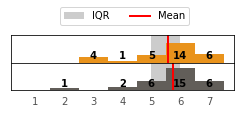

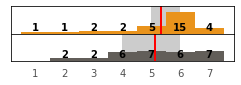

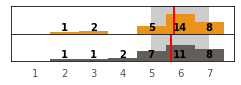

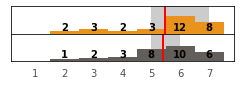

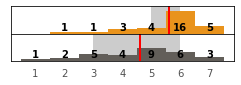

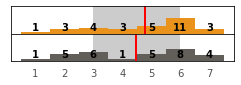

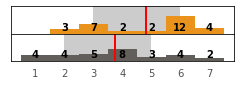

In [24]:
for i in range(7):
    labels = ['C1','C2','C3','C4','C5','C6','C7']
    drawDistributionHist(rst_study1[collage_labels[i]],rst_study1[comics_labels[i]],labels[i])

In [11]:
labels = ['C1','C2','C3','C4','C5','C6','C7']
tmp_dict = {'No': list(rst_study1['NO.'])+list(rst_study1['NO.']), 'Format': ['Collage']*30+['Comics']*30}
for i in range(7):
    tmp_dict[labels[i]] = list(rst_study1[collage_labels[i]]) + list(rst_study1[comics_labels[i]])
df = pd.DataFrame(tmp_dict)

# Conduct the repeated measures ANOVA
for i in range(7):
    print("----------------", labels[i], "----------------")
    print(AnovaRM(data=df, depvar=labels[i], subject='No', within=['Format']).fit())

---------------- C1 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.3887 1.0000 29.0000 0.5378

---------------- C2 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.2979 1.0000 29.0000 0.5893

---------------- C3 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.1266 1.0000 29.0000 0.7245

---------------- C4 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.0289 1.0000 29.0000 0.8662

---------------- C5 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  7.2500 1.0000 29.0000 0.0117

---------------- C6 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.5426 1.0

In [12]:
readers_ratings = {'Collage':{},'Comics':{}}
labels = ['C1','C2','C3','C4','C5','C6','C7']
for i in range(7):
    readers_ratings['Collage'][labels[i]] = list(rst_study1[collage_labels[i]])
    readers_ratings['Comics'][labels[i]] = list(rst_study1[comics_labels[i]])

In [13]:
keys = list(readers_ratings['Collage'].keys())
individual_diff = {}
for i in range(len(labels)):
    individual_diff[keys[i]] = []
    for user in range(10):
        individual_diff[keys[i]].append(readers_ratings['Collage'][keys[i]][user] - readers_ratings['Comics'][keys[i]][user])

<Figure size 288x72 with 0 Axes>

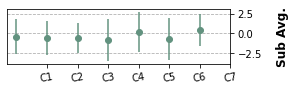

In [14]:
keys, data = [*zip(*individual_diff.items())]
data_mean = [np.mean(x) for x in data]
data_std = [np.std(x) for x in data]

fig = plt.figure(figsize=(4, 1))
fig, ax = plt.subplots(figsize=(4, 1))

#ax.scatter(list(keys), data_mean, color="#62927F")
ax.errorbar(list(keys), data_mean, yerr=data_std, fmt="o", color="#62927F")

ax.set_xticks(range(1, len(keys) + 1), keys, rotation=10)
ax.set_ylabel("Sub Avg.",fontsize=12,labelpad=14,fontweight='bold')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.grid(linestyle='--',axis="y")
plt.grid(linestyle='',axis="x")
plt.show()

<Figure size 288x72 with 0 Axes>

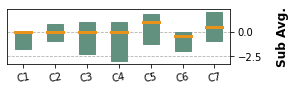

In [17]:
# Python 3.5+
keys, data = [*zip(*individual_diff.items())]  # 'transpose' items to parallel key, value lists

fig = plt.figure(figsize=(4, 1))
fig, ax = plt.subplots(figsize=(4, 1))

b_c = "#62927F"
m_c = "#E9931C"
bplot = ax.boxplot(data, showfliers=False, whis=False, patch_artist=True, #showmeans=True, #meanline=True,
            boxprops=dict(facecolor=b_c, color=b_c),
            medianprops=dict(color=m_c,linewidth=3),
            #meanprops=dict(color=m_c, linewidth=3, linestyle='-'),
            capprops=dict(color=b_c),
            whiskerprops=dict(color=b_c),
            flierprops=dict(color=b_c, markeredgecolor=b_c),
            )

ax.set_xticks(range(1, len(keys) + 1), keys, rotation=10)
ax.set_ylabel("Sub Avg.",fontsize=12,labelpad=14,fontweight='bold')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.grid(linestyle='--',axis="y")
plt.grid(linestyle='',axis="x")
plt.show()

### Objective Feedback - Task Performance

In [5]:
import scipy.stats as stats
import scipy
from collections import defaultdict
import statistics

def drawBarH(datas,ylabel,xlabel,title):
    x = list(datas["Collage"].keys())
    result = defaultdict(lambda:defaultdict(list))

    for condition,data in datas.items():
        for round,datas in data.items():
            mean = np.mean(np.array(datas))
            std = np.std(np.array(datas))
            result[condition]["mean"].append(float(mean))
            result[condition]["std"].append(float(std))

    mark={
        "Collage":"o",
        "Comics":"o"
    }
    color={
        "Collage":"#E9931C",
        "Comics":"#625E59"
    }

    #plot 1
    #plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(4.5, 3))
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.set_xlabel(ylabel,fontsize=14,labelpad=14,fontweight='bold')
    ax.set_ylabel(xlabel,fontsize=14,labelpad=14,fontweight='bold')
    #ax1.set_ylim((-0.1,1.1))
    
    
    ind = np.arange(len(result["Collage"]["mean"]))  
    width = 0.4  # the width of the bars

    #for condition,data in result.items():
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.barh(ind, result["Collage"]["mean"], xerr=np.array(result["Collage"]["std"]), ecolor='#FFD8A3', error_kw=dict(lw=5, capsize=5, capthick=3),
            align='center', height=0.4, color=color["Collage"], label="Collage")
    ax.barh(ind + width, result["Comics"]["mean"], xerr=np.array(result["Comics"]["std"]), ecolor='#DFDFDF', error_kw=dict(lw=5, capsize=5, capthick=3),
            align='center', height=0.4, color=color["Comics"], label="Comics")
    
    for i in ax.patches:
        value = float("{0:.2f}".format(i.get_width()))
        plt.text(i.get_width()+0.05, i.get_y()+0.3, value, fontsize=10, fontweight='bold') 
        
    ax.legend(ncol=2, bbox_to_anchor=(0.2, 1.2), loc='lower left', fontsize='small')
    ax.set_yticks(ind, labels=x)
    ax.set_title(title, loc='center', fontsize=16)
    
    plt.grid(linestyle='',axis="y")
    plt.grid(linestyle='--',axis="x")
    
    #plt.savefig("figure\\Study1_Object_Records.pdf",dpi=600,format="pdf")
    #plt.savefig("figure\\Study1_Object_Records.png",dpi=600,format="png")

<Figure size 324x216 with 0 Axes>

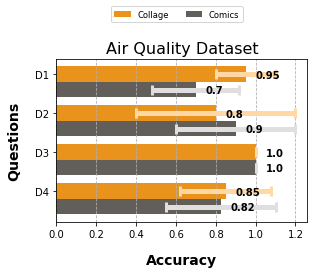

In [14]:
AQ_datas_accu = {'Collage':{'D1':[1,1,1,1,1,1,1,1,0.5,1],
                            'D2':[0,1,0,1,1,1,1,1,1,1],
                            'D3':[1,1,1,1,1,1,1,1,1,1],
                            'D4':[1,1,0.5,0.5,1,1,0.5,1,1,1]},
                 'Comics':{'D1':[0.5,0.5,1,0.5,0.5,0.75,0.75,0.5,1,1],
                           'D2':[1,0,1,1,1,1,1,1,1,1],
                           'D3':[1,1,1,1,1,1,1,1,1,1],
                           'D4':[1,1,1,1,0.5,1,0.5,1,0.25,1]},
}
drawBarH(AQ_datas_accu, 'Accuracy', 'Questions', 'Air Quality Dataset')

<Figure size 324x216 with 0 Axes>

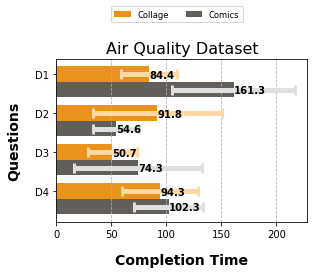

In [15]:
AQ_datas_time = {'Collage':{'D1':[109,79,55,124,69,97,90,91,98,32],
                            'D2':[55,48,38,34,66,107,234,152,97,87],
                            'D3':[74,52,32,30,46,39,104,30,60,40],
                            'D4':[79,143,40,155,57,85,119,85,106,74]},
                 'Comics':{'D1':[198,190,141,280,98,183,94,162,180,87],
                           'D2':[67,59,27,65,107,40,48,48,43,42],
                           'D3':[91,69,48,67,51,241,63,34,35,44],
                           'D4':[112,72,85,143,108,134,91,61,153,64]},
}
drawBarH(AQ_datas_time, 'Completion Time', 'Questions', 'Air Quality Dataset')

<Figure size 324x216 with 0 Axes>

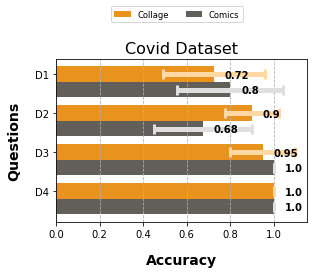

In [16]:
Covid_datas_accu = {'Collage':{'D1':[1,0.5,0.5,1,0.5,0.5,0.75,0.5,1,1],
                               'D2':[0.75,0.75,1,1,1,1,0.75,1,0.75,1],
                               'D3':[1,1,1,1,1,1,1,0.5,1,1],
                               'D4':[1,1,1,1,1,1,1,1,1,1]},
                     'Comics':{'D1':[1,1,1,1,1,1,0.5,0.5,0.5,0.5],
                               'D2':[0.5,0.5,0.5,0.5,0.5,1,0.75,1,0.5,1],
                               'D3':[1,1,1,1,1,1,1,1,1,1],
                               'D4':[1,1,1,1,1,1,1,1,1,1]},
}
drawBarH(Covid_datas_accu, 'Accuracy', 'Questions', 'Covid Dataset')

<Figure size 324x216 with 0 Axes>

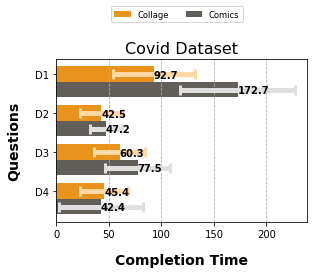

In [17]:
Covid_datas_time = {'Collage':{'D1':[104,50,144,97,77,58,112,62,52,171],
                            'D2':[84,32,46,57,19,28,27,32,33,67],
                            'D3':[55,37,34,86,63,55,109,48,31,85],
                            'D4':[22,64,55,21,34,20,36,52,52,98]},
                 'Comics':{'D1':[206,120,177,253,137,78,133,257,164,202],
                            'D2':[75,73,31,43,33,47,47,52,43,28],
                            'D3':[52,69,78,89,97,46,157,57,54,76],
                            'D4':[41,24,18,157,27,51,23,22,42,19]},
}
drawBarH(Covid_datas_time, 'Completion Time', 'Questions', 'Covid Dataset')

<Figure size 324x216 with 0 Axes>

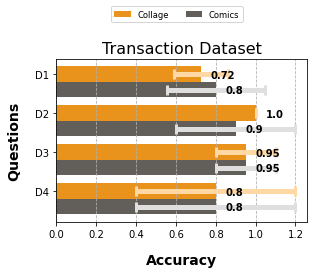

In [18]:
TR_datas_accu = {'Collage':{'D1':[0.75,0.75,0.75,0.75,0.5,0.75,1,0.75,0.75,0.5],
                            'D2':[1,1,1,1,1,1,1,1,1,1],
                            'D3':[1,1,1,1,1,1,0.5,1,1,1],
                            'D4':[1,1,1,0,1,1,0,1,1,1]},
                 'Comics':{'D1':[1,0.5,1,1,0.5,1,1,1,0.5,0.5],
                           'D2':[1,1,1,1,1,1,0,1,1,1],
                           'D3':[1,1,1,1,1,1,0.5,1,1,1],
                           'D4':[0,1,1,1,1,1,0,1,1,1]},
}
drawBarH(TR_datas_accu, 'Accuracy', 'Questions', 'Transaction Dataset')

<Figure size 324x216 with 0 Axes>

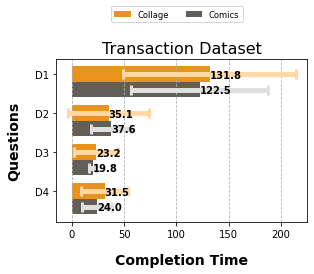

In [19]:
TR_datas_time = {'Collage':{'D1':[129,343,50,96,103,182,32,98,166,119],
                            'D2':[13,66,35,9,19,142,11,21,17,18],
                            'D3':[41,80,17,14,13,22,11,9,12,13],
                            'D4':[37,24,11,70,28,75,5,21,31,13]},
                 'Comics':{'D1':[87,197,185,26,64,123,32,117,190,204],
                           'D2':[18,36,36,11,21,36,47,30,75,66],
                           'D3':[18,24,21,17,22,23,11,22,20,20],
                           'D4':[36,18,30,13,10,17,22,12,21,61]},
}
drawBarH(TR_datas_time, 'Completion Time', 'Questions', 'Transaction Dataset')

<Figure size 324x216 with 0 Axes>

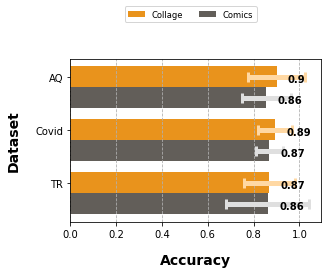

In [20]:
total_dataset_accu = {'Collage':{'AQ':[np.mean(x) for x in zip(*list(AQ_datas_accu['Collage'].values()))],
                                 'Covid':[np.mean(x) for x in zip(*list(Covid_datas_accu['Collage'].values()))],
                                 'TR':[np.mean(x) for x in zip(*list(TR_datas_accu['Collage'].values()))]},
                      'Comics':{'AQ':[np.mean(x) for x in zip(*list(AQ_datas_accu['Comics'].values()))],
                                'Covid':[np.mean(x) for x in zip(*list(Covid_datas_accu['Comics'].values()))],
                                'TR':[np.mean(x) for x in zip(*list(TR_datas_accu['Comics'].values()))]}
                      }

drawBarH(total_dataset_accu, 'Accuracy', 'Dataset', '')

<Figure size 324x216 with 0 Axes>

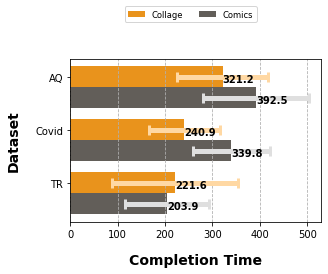

In [21]:
total_dataset_time = {'Collage':{'AQ':[sum(x) for x in zip(*list(AQ_datas_time['Collage'].values()))],
                                 'Covid':[sum(x) for x in zip(*list(Covid_datas_time['Collage'].values()))],
                                 'TR':[sum(x) for x in zip(*list(TR_datas_time['Collage'].values()))]},
                      'Comics':{'AQ':[sum(x) for x in zip(*list(AQ_datas_time['Comics'].values()))],
                                'Covid':[sum(x) for x in zip(*list(Covid_datas_time['Comics'].values()))],
                                'TR':[sum(x) for x in zip(*list(TR_datas_time['Comics'].values()))]}
                     }

drawBarH(total_dataset_time, 'Completion Time', 'Dataset', '')

<Figure size 324x216 with 0 Axes>

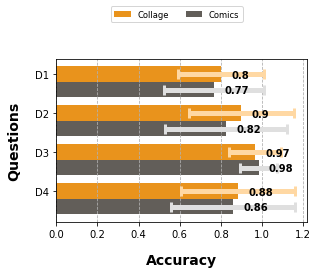

In [22]:
questions = ['D1','D2','D3','D4']
total_questions_accu = {'Collage':{},'Comics':{}}

# for d in questions:
#     total_questions_accu['Collage'][d] = AQ_datas_accu['Collage'][d] + Covid_datas_accu['Collage'][d] + TR_datas_accu['Collage'][d]
#     total_questions_accu['Comics'][d] = AQ_datas_accu['Comics'][d] + Covid_datas_accu['Comics'][d] + TR_datas_accu['Comics'][d]

for i in range(4):
    total_questions_accu['Collage'][questions[i]] = list(rst_study1['Collage_'+questions[i]+'_Accu'])
    total_questions_accu['Comics'][questions[i]] = list(rst_study1['Comic_'+questions[i]+'_Accu'])
    
drawBarH(total_questions_accu, 'Accuracy', 'Questions', '')

In [23]:
questions = ['D1','D2','D3','D4']
tmp_dict = {'No': list(rst_study1['NO.'])+list(rst_study1['NO.']), 'Format': ['Collage']*30+['Comics']*30}
for i in range(4):
    tmp_dict[questions[i]] = list(rst_study1['Collage_'+questions[i]+'_Accu']) + list(rst_study1['Comic_'+questions[i]+'_Accu'])
df = pd.DataFrame(tmp_dict)

# Conduct the repeated measures ANOVA
for i in range(4):
    print("----------------", questions[i], "----------------")
    print(AnovaRM(data=df, depvar=questions[i], subject='No', within=['Format']).fit())

---------------- D1 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.2691 1.0000 29.0000 0.6078

---------------- D2 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  1.0262 1.0000 29.0000 0.3194

---------------- D3 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  1.0000 1.0000 29.0000 0.3256

---------------- D4 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.1786 1.0000 29.0000 0.6757



<Figure size 324x216 with 0 Axes>

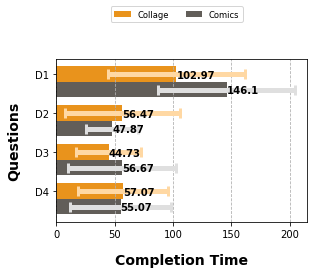

In [24]:
total_questions_time = {'Collage':{}, 'Comics':{}}
questions = ['D1','D2','D3','D4']

# for d in questions:
#     total_questions_time['Collage'][d] = AQ_datas_time['Collage'][d] + Covid_datas_time['Collage'][d] + TR_datas_time['Collage'][d]
#     total_questions_time['Comics'][d] = AQ_datas_time['Comics'][d] + Covid_datas_time['Comics'][d] + TR_datas_time['Comics'][d]

for i in range(4):
    total_questions_time['Collage'][questions[i]] = list(rst_study1['Collage_'+questions[i]+'_Time'])
    total_questions_time['Comics'][questions[i]] = list(rst_study1['Comic_'+questions[i]+'_Time'])
    
drawBarH(total_questions_time, 'Completion Time', 'Questions', '')

In [25]:
questions = ['D1','D2','D3','D4']
tmp_dict = {'No': list(rst_study1['NO.'])+list(rst_study1['NO.']), 'Format': ['Collage']*30+['Comics']*30}
for i in range(4):
    tmp_dict[questions[i]] = list(rst_study1['Collage_'+questions[i]+'_Time']) + list(rst_study1['Comic_'+questions[i]+'_Time'])
df = pd.DataFrame(tmp_dict)

# Conduct the repeated measures ANOVA
for i in range(4):
    print("----------------", questions[i], "----------------")
    print(AnovaRM(data=df, depvar=questions[i], subject='No', within=['Format']).fit())

---------------- D1 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format 10.6761 1.0000 29.0000 0.0028

---------------- D2 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.7624 1.0000 29.0000 0.3897

---------------- D3 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  2.4088 1.0000 29.0000 0.1315

---------------- D4 ----------------
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Format  0.0587 1.0000 29.0000 0.8102



In [26]:
collage = total_questions_time['Collage']['D4']
comics = total_questions_time['Comics']['D4']
checkNormal(collage, comics)
print(stats.kruskal(collage,comics))
print(stats.f_oneway(collage,comics))

[79, 37, 143, 22, 64, 40, 155, 55, 24, 11, 21, 34, 57, 70, 20, 85, 28, 119, 75, 36, 5, 52, 21, 85, 31, 106, 74, 52, 98, 13]
[112, 36, 72, 41, 24, 85, 108, 18, 18, 30, 157, 27, 108, 13, 51, 134, 10, 91, 17, 23, 22, 22, 12, 61, 21, 153, 64, 42, 19, 61]
k2 = 4.55742, p = 0.102416
k2 = 5.33559, p = 0.0694053
Data1 is normal distribution. The null hypothesis cannot be rejected.
Data2 is normal distribution. The null hypothesis cannot be rejected.
KruskalResult(statistic=0.3158039106663011, pvalue=0.5741403207768918)
F_onewayResult(statistic=0.034657994643281564, pvalue=0.8529637309535879)


# VisCollage Study 2 Results Analysis

### Subjective Feedback - Method Ratings

In [8]:
rst_study2 = pd.read_csv('VisCollage_Result-Study2.csv')

In [30]:
import scipy.stats as stats
import scipy
from collections import defaultdict
import statistics

In [12]:
def drawBar(datas,ylabel,colors):
    fig = plt.figure(figsize=(15, 4))
    fig.tight_layout()
       
    draw_data = defaultdict(list)

    for key,values in datas.items():
        draw_data["mean"].append(scipy.mean(values))
        draw_data["std"].append(statistics.stdev(values))

    ax1 = plt.subplot(1,1,1)    
        
    ax1.set_ylabel(ylabel,fontsize=15,labelpad=20)

    ind = np.arange(len(draw_data["mean"]))  
    plt.yticks(fontsize=15)
    plt.xticks(ind,fontsize=15)
    ax1.set_xticklabels(datas.keys())
    
    ax1.bar(ind, draw_data["mean"],yerr=draw_data["std"],color=colors,capsize=4,
           ecolor='#CCCCCC', error_kw=dict(lw=5, capsize=5, capthick=3))
    plt.grid(linestyle='--',axis="y")
    
    for i in ax1.patches:
        value = float("{0:.2f}".format(i.get_height()))
        plt.text(i.get_x()+0.2, i.get_height()+0.2, value, fontsize=10, fontweight='bold') 
    
    # #plt.savefig("figure\\Study2_Subject_Rates.pdf",dpi=600,format="pdf")
    # #plt.savefig("figure\\Study2_Subject_Rates.png",dpi=600,format="png")

In [15]:
labels = ['M1','M2','M3','M4','M5','M6','M7','O1','O2','C1','C2','C3','C4','C5','C6','C7','F1']
subject_ratings = {}
for i in range(len(labels)):
    subject_ratings[labels[i]] = list(rst_study2[labels[i]])

drawBar(subject_ratings,"Mean of subject rating",["#0068b2"]*8+["#004CB2"]+["#00B24E"]*8)

M1 [6, 5, 6, 6, 5, 6, 5, 6, 5, 6]
M2 [6, 6, 6, 6, 6, 7, 5, 6, 6, 5]
M3 [6, 6, 4, 6, 6, 7, 5, 7, 6, 7]
M4 [6, 6, 5, 6, 6, 6, 6, 6, 5, 5]
M5 [6, 7, 7, 6, 6, 6, 6, 6, 6, 4]
M6 [6, 6, 6, 4, 6, 7, 6, 7, 6, 6]
M7 [6, 5, 6, 5, 5, 7, 6, 5, 6, 7]
O1 [6, 6, 5, 6, 5, 7, 6, 6, 6, 5]
O2 [7, 5, 6, 6, 6, 7, 6, 6, 6, 6]
C1 [7, 2, 3, 6, 4, 7, 7, 6, 7, 4]
C2 [7, 5, 5, 6, 5, 7, 6, 7, 7, 6]
C3 [7, 6, 3, 6, 6, 7, 6, 7, 7, 6]
C4 [7, 6, 6, 5, 5, 7, 5, 7, 7, 6]
C5 [7, 6, 4, 6, 5, 7, 4, 6, 5, 7]
C6 [7, 7, 6, 4, 6, 7, 6, 6, 6, 7]
C7 [6, 6, 5, 6, 5, 7, 6, 6, 7, 5]
F1 [7, 6, 4, 6, 5, 7, 6, 7, 6, 6]


<Figure size 1080x288 with 0 Axes>

In [49]:
def drawBar_combinedC(datas,ylabel,colors):
    fig = plt.figure(figsize=(14, 4))
    fig.tight_layout()
       
    draw_data = defaultdict(list)

    for key,values in datas.items():
        # print(key, values)
        draw_data["mean"].append(scipy.mean(values))
        draw_data["std"].append(statistics.stdev(values))

    ax1 = plt.subplot(1,1,1)    
        
    ax1.set_ylabel(ylabel,fontsize=15,labelpad=20)

    ind = np.arange(len(draw_data["mean"]))  
    plt.yticks(fontsize=15)
    plt.xticks(ind,fontsize=15)
    # ax1.set_xticklabels(datas.keys())
    x_axis = ['M1','M2','M3','M4','M5','M6','O1','O2','D1','D2','D3','F1']
    ax1.set_xticklabels(x_axis)
    ax1.bar(ind, draw_data["mean"],width = 0.6, yerr=draw_data["std"],color=colors,capsize=4,
           ecolor='#CCCCCC', error_kw=dict(lw=5, capsize=5, capthick=3))
    plt.grid(linestyle='--',axis="y")
    
    for i in ax1.patches:
        value = float("{0:.2f}".format(i.get_height()))
        plt.text(i.get_x()+0.2, i.get_height()+0.2, value, fontsize=10, fontweight='bold') 
    
    plt.savefig("Study2_Subject_Rates.pdf",dpi=600,format="pdf")
    # #plt.savefig("figure\\Study2_Subject_Rates.png",dpi=600,format="png")

/var/folders/gg/x6rv002j1_l2vp8hz_ljwklh0000gn/T/ipykernel_67629/1334212470.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  draw_data["mean"].append(scipy.mean(values))


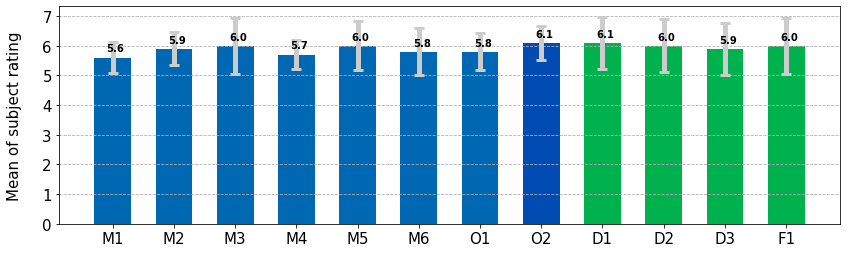

In [50]:
## mod : D1 = C2; D2 = C3, C7; D3 = C4, C5
# labels = ['M1','M2','M3','M4','M5','M7','O1','O2','C2','C3','C7','C4','C5','F1']
labels = ['M1','M2','M3','M4','M5','M7','O1','O2','C2','C3','C4','F1']
subject_ratings = {}
for i in range(len(labels)):
    if labels[i] == 'C3':
        subject_ratings[labels[i]] = list(rst_study2[labels[i]]/2+rst_study2['C7']/2)
    elif labels[i] == 'C4':
        subject_ratings[labels[i]] = list(rst_study2[labels[i]]/2+rst_study2['C5']/2)
    else:
        subject_ratings[labels[i]] = list(rst_study2[labels[i]])

drawBar_combinedC(subject_ratings,"Mean of subject rating",["#0068b2"]*7+["#004CB2"]+["#00B24E"]*4)

### Objective Feedback - User Logs

In [30]:
def read(path):
    with open(path,encoding='utf-8')as f:
        return json.load(f)

In [31]:
def readFile(path):
    exclude_list=[]
    result_data = defaultdict(dict)

    for filename in os.listdir(path):        
        if filename[0]=="u":
            data = read(path+'/'+filename)        
            user = filename
            if user not in exclude_list:
                result_data[user] = data

    return result_data

In [32]:
user_logs = readFile("../src/collage_logs")

In [33]:
# Placement adjust distance
user_adjust_dist = OrderedDict()
for user,datas in user_logs.items():
    if "AQ" in user:
        print(user)
        select = datas['pages'][0]['layout'][-1]['origin_theme'][-1]
        origin = datas['pages'][0]['layout'][-1]['theme'][select]['origin']['annoBox']
        final = datas['pages'][0]['layout'][-1]['theme'][select]['final']['annoBox']
        canvas = (datas['pages'][0]['layout'][-1]['theme'][select]['canvas_info']['width'],
                  datas['pages'][0]['layout'][-1]['theme'][select]['canvas_info']['height'])
        print(canvas)
        if origin and final:
            total_dist = 0
            for i in range(len(origin)):
                total_dist += math.dist(origin[i], final[i])
            print(round(total_dist/len(origin),2))
            user_adjust_dist['User '+user.split('_')[1]] = round(total_dist/len(origin),2)
#         else:
#             user_adjust_dist['User '+user.split('_')[1]] = 0

user_10_AQ_collage.json
(938, 480)
100.87
user_1_AQ_collage.json
(935, 480)
68.71
user_2_AQ_collage.json
(935, 480)
378.62
user_3_AQ_collage.json
(935, 480)
31.4
user_4_AQ_collage.json
(944, 480)
384.18
user_5_AQ_collage.json
(1085, 433)
user_6_AQ_collage.json
(938, 480)
91.75
user_7_AQ_collage.json
(944, 470)
170.61
user_8_AQ_collage.json
(938, 480)
620.68
user_9_AQ_collage.json
(938, 480)
484.81


In [34]:
def drawDist(data):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    users = list(data.keys()) 
    dist = list(data.values()) 

    # creating the bar plot 
    ax.barh(users, dist, color="#0068b2") 
    
    ax.axvline(np.quantile(dist,0.75,interpolation='higher'), color='g', linestyle='--', linewidth=2, label='quantlie')
    ax.axvline(np.quantile(dist,0.25,interpolation='lower'), color='g', linestyle='--', linewidth=2)
    ax.axvline(np.mean(dist), color='r', linestyle='--', linewidth=2, label='mean')
    ax.legend(loc='upper right')
    ax.invert_yaxis()
    ax.set_xlabel("Distance Gap") 
    ax.set_ylabel("Participants") 
    ax.set_title("Average Modification Distance of each Participants")
    
    for i in ax.patches:
        value = float("{0:.2f}".format(i.get_width()))
        plt.text(i.get_width()+10, i.get_y()+0.5, value, fontsize=10, fontweight='bold') 
        
    plt.grid(linestyle='--',axis="x")
    plt.show()

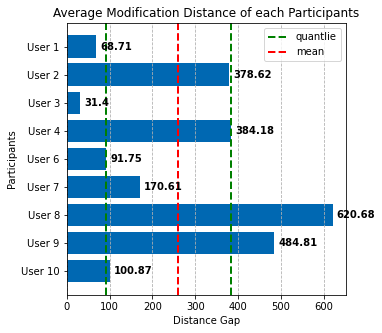

In [35]:
user_adjust_dist.move_to_end('User 10')
drawDist(user_adjust_dist)

# VisCollage Study 3 Results Analysis

### Subjective Feedback - Challenges Ratings

In [36]:
def drawBarV(datas,ylabel,xlabel,title,colors,ecolors):

    
    c = list(datas.keys())
    x = list(datas[c[0]].keys())
    result = defaultdict(lambda:defaultdict(list))

    for condition,data in datas.items():
        for round,datas in data.items():
            mean = np.mean(np.array(datas))
            std = np.std(np.array(datas))
            result[condition]["mean"].append(float(mean))
            result[condition]["std"].append(float(std))

    #plot 1
    #plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(12, 4))
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_ylabel(ylabel,fontsize=14,labelpad=14,fontweight='bold')
    ax.set_xlabel(xlabel,fontsize=14,labelpad=14,fontweight='bold')
    #ax1.set_ylim((-0.1,1.1))
    
    
    ind = np.arange(len(result[c[0]]["mean"]))  
    width = 0.3  # the width of the bars

    #for condition,data in result.items():
    for i in range(len(c)):
        offset = -0.2 if i == 0 else 0.2
        #offset = 0 if i == 1 else offset 
        ax.bar(ind + offset, result[c[i]]["mean"], yerr=np.array(result[c[i]]["std"]), ecolor=ecolors[i], error_kw=dict(lw=5, capsize=5, capthick=3),
            align='center', width=width, color=colors[i], label=c[i])
    
    for i in ax.patches:
        value = float("{0:.2f}".format(i.get_height()))
        plt.text(i.get_x()+0.05, i.get_height()+0.2, value, fontsize=10, fontweight='bold') 
        
    ax.legend(ncol=len(c), loc='upper right', fontsize='small')
    ax.set_xticks(ind, labels=x, rotation=10)
    ax.set_title(title, loc='center', fontsize=16, fontweight='bold')
    
    plt.grid(linestyle='--',axis="y")
    plt.grid(linestyle='',axis="x")
    
    #plt.savefig("figure\\Study1_Object_Records.pdf",dpi=600,format="pdf")
    #plt.savefig("figure\\Study1_Object_Records.png",dpi=600,format="png")

<Figure size 864x288 with 0 Axes>

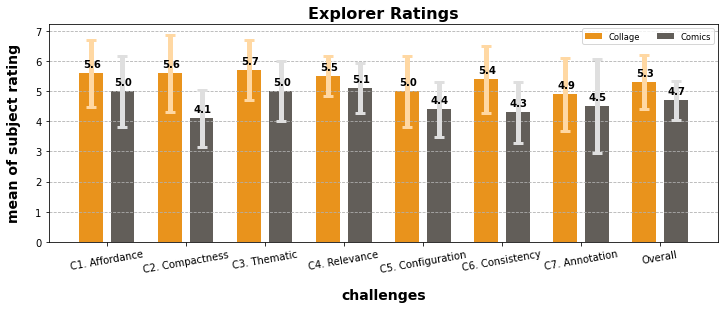

In [37]:
labels = ['C1','C2','C3','C4','C5','C6','C7','Overall']
    
challenges = ['. Affordance','. Compactness','. Thematic','. Relevance',
              '. Configuration','. Consistency','. Annotation','']

explorer_ratings = {'Collage':{}, 'Comics':{}}
for i in range(len(labels)):
    explorer_ratings['Collage'][labels[i]+challenges[i]] = list(rst_study2['Collage_'+labels[i]])
    explorer_ratings['Comics'][labels[i]+challenges[i]] = list(rst_study2['Comic_'+labels[i]])
drawBarV(explorer_ratings, 'mean of subject rating', 'challenges', 'Explorer Ratings',['#E9931C','#625E59'],['#FFD8A3','#DFDFDF'])

In [38]:
explorer_ratings

{'Collage': {'C1. Affordance': [4, 6, 6, 6, 6, 7, 3, 6, 6, 6],
  'C2. Compactness': [5, 7, 3, 6, 7, 7, 4, 5, 6, 6],
  'C3. Thematic': [6, 6, 4, 6, 6, 7, 4, 5, 6, 7],
  'C4. Relevance': [6, 6, 5, 6, 5, 6, 4, 5, 6, 6],
  'C5. Configuration': [5, 6, 3, 6, 6, 6, 5, 4, 6, 3],
  'C6. Consistency': [6, 5, 4, 4, 6, 7, 5, 4, 6, 7],
  'C7. Annotation': [5, 5, 3, 6, 5, 7, 3, 4, 5, 6],
  'Overall': [5, 5, 4, 6, 5, 7, 4, 5, 6, 6]},
 'Comics': {'C1. Affordance': [6, 4, 6, 4, 5, 7, 4, 3, 5, 6],
  'C2. Compactness': [5, 3, 4, 3, 5, 5, 5, 3, 5, 3],
  'C3. Thematic': [6, 5, 3, 4, 6, 5, 6, 5, 6, 4],
  'C4. Relevance': [6, 5, 4, 5, 6, 4, 6, 4, 5, 6],
  'C5. Configuration': [5, 3, 4, 5, 6, 3, 5, 4, 5, 4],
  'C6. Consistency': [6, 4, 5, 3, 4, 3, 5, 3, 5, 5],
  'C7. Annotation': [6, 6, 5, 2, 5, 2, 4, 3, 6, 6],
  'Overall': [5, 5, 5, 4, 5, 5, 5, 3, 5, 5]}}

In [39]:
keys = list(explorer_ratings['Collage'].keys())
individual_diff = {}
for i in range(len(labels)):
    individual_diff[keys[i]] = []
    for user in range(10):
        individual_diff[keys[i]].append(explorer_ratings['Collage'][keys[i]][user] - explorer_ratings['Comics'][keys[i]][user])

<Figure size 864x288 with 0 Axes>

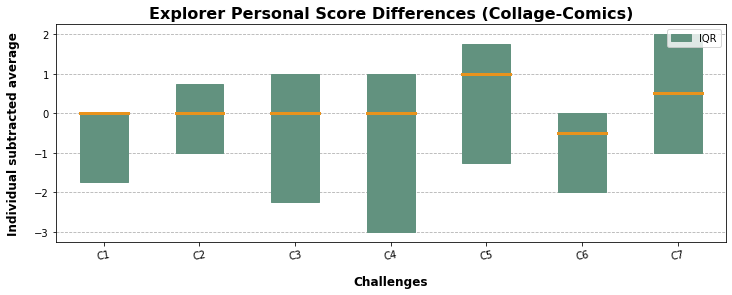

In [20]:
# Python 3.5+
keys, data = [*zip(*individual_diff.items())]  # 'transpose' items to parallel key, value lists

fig = plt.figure(figsize=(12, 4))
fig, ax = plt.subplots(figsize=(12, 4))

b_c = "#62927F"
m_c = "#E9931C"
bplot = ax.boxplot(data, showfliers=False, whis=False, patch_artist=True,
            boxprops=dict(facecolor=b_c, color=b_c),
            medianprops=dict(color=m_c,linewidth=3, label='Median'),
            capprops=dict(color=b_c),
            whiskerprops=dict(color=b_c),
            flierprops=dict(color=b_c, markeredgecolor=b_c),
            )

ax.set_xticks(range(1, len(keys) + 1), keys, rotation=10)
ax.set_title("Explorer Personal Score Differences (Collage-Comics)", loc='center', fontsize=16, fontweight='bold')
ax.set_ylabel("Individual subtracted average",fontsize=12,labelpad=14,fontweight='bold')
ax.set_xlabel("Challenges",fontsize=12,labelpad=14,fontweight='bold')
ax.legend([bplot["boxes"][0]], ['IQR'], loc='upper right')
plt.grid(linestyle='--',axis="y")
plt.grid(linestyle='',axis="x")
plt.show()

In [41]:
labels = ['C1','C2','C3','C4','C5','C6','C7','Overall']
tmp_dict = {'No': list(rst_study2['NO'])+list(rst_study2['NO']), 'Format': ['Collage']*10+['Comics']*10}
for i in range(8):
    tmp_dict[labels[i]] = list(rst_study2['Collage_'+labels[i]]) + list(rst_study2['Comic_'+labels[i]])
df = pd.DataFrame(tmp_dict)

# Conduct the repeated measures ANOVA
for i in range(8):
    print("----------------", labels[i], "----------------")
    print(AnovaRM(data=df, depvar=labels[i], subject='No', within=['Format']).fit())

---------------- C1 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  1.5882 1.0000 9.0000 0.2393

---------------- C2 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  7.6415 1.0000 9.0000 0.0220

---------------- C3 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  2.4365 1.0000 9.0000 0.1530

---------------- C4 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  1.1613 1.0000 9.0000 0.3092

---------------- C5 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  1.7609 1.0000 9.0000 0.2172

---------------- C6 ----------------
               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Format  6.4438 1.0000 9.0000 0.0318

In [42]:
collage = explorer_ratings['Collage']['Overall']
comics = explorer_ratings['Comics']['Overall']
checkNormal(collage, comics)
print(stats.kruskal(collage,comics))
print(stats.f_oneway(collage,comics))

[5, 5, 4, 6, 5, 7, 4, 5, 6, 6]
[5, 5, 5, 4, 5, 5, 5, 3, 5, 5]
k2 = 0.133212, p = 0.935564
k2 = 15.4718, p = 0.000436863
Data1 is normal distribution. The null hypothesis cannot be rejected.
Data2 is not normal distribution. The null hypothesis can be rejected.
KruskalResult(statistic=2.1200772200772153, pvalue=0.1453792140698878)
F_onewayResult(statistic=2.655737704918033, pvalue=0.12055136264861456)


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 864x288 with 0 Axes>

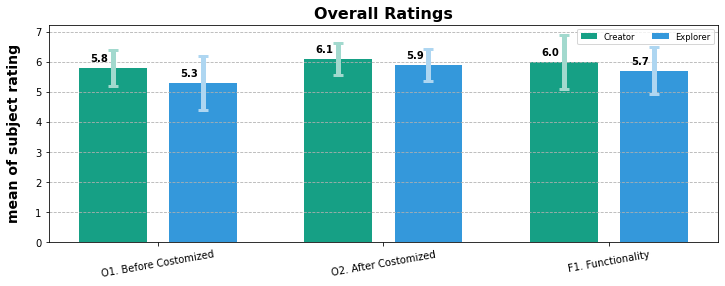

In [43]:
overall_ratings = {'Creator':{'O1. Before Costomized':[6,6,5,6,5,7,6,6,6,5],
                              'O2. After Costomized':[7,5,6,6,6,7,6,6,6,6],
                              'F1. Functionality':[7,6,4,6,5,7,6,7,6,6]},
                  'Explorer':{'O1. Before Costomized':[5,5,4,6,5,7,4,5,6,6],
                              'O2. After Costomized':[5,6,5,6,6,7,6,6,6,6],
                              'F1. Functionality':[6,5,4,6,6,7,5,6,6,6]}}
drawBarV(overall_ratings, 'mean of subject rating', '', 'Overall Ratings',['#16A085','#3498DB'],['#A2D9CE','#AED6F1'])

In [44]:
creator = overall_ratings['Creator']['F1. Functionality']
explorer = overall_ratings['Explorer']['F1. Functionality']
checkNormal(creator, explorer)
print(stats.kruskal(creator,explorer))
print(stats.f_oneway(creator,explorer))

[7, 6, 4, 6, 5, 7, 6, 7, 6, 6]
[6, 5, 4, 6, 6, 7, 5, 6, 6, 6]
k2 = 3.13999, p = 0.208046
k2 = 2.4911, p = 0.287783
Data1 is normal distribution. The null hypothesis cannot be rejected.
Data2 is normal distribution. The null hypothesis cannot be rejected.
KruskalResult(statistic=0.839817351598168, pvalue=0.35944901357395664)
F_onewayResult(statistic=0.5744680851063828, pvalue=0.45829788292634854)


### Reader / Creator / Explorer Ratings for 7 Challenges

In [45]:

Roles_Ratings = {'Readers': {'C1. Affordance':[3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7],
                             'C2. Compactness':[1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7],
                             'C3. Thematic':[2, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7],
                             'C4. Relevence':[2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7],
                             'C5. Configuration':[2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7],
                             'C6. Consistency':[1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7],
                             'C7. Annotation':[2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7],},
                 'Creators': {'C1. Affordance':[7,2,3,6,4,7,7,6,7,4],
                              'C2. Compactness':[7,5,5,6,5,7,6,7,7,6],
                              'C3. Thematic':[7,6,3,6,6,7,6,7,7,6],
                              'C4. Relevence':[7,6,6,5,5,7,5,7,7,6],
                              'C5. Configuration':[7,6,4,6,5,7,4,6,5,7],
                              'C6. Consistency':[7,7,6,4,6,7,6,6,6,7],
                              'C7. Annotation':[6,6,5,6,5,7,6,6,7,5]},
                 'Explorers': {'C1. Affordance':[4,6,6,6,6,7,3,6,6,6],
                               'C2. Compactness':[5,7,3,6,7,7,4,5,6,6],
                               'C3. Thematic':[6,6,4,6,6,7,4,5,6,7],
                               'C4. Relevence':[6,6,5,6,5,6,4,5,6,6],
                               'C5. Configuration':[5,6,3,6,6,6,5,4,6,3],
                               'C6. Consistency':[6,5,4,4,6,7,5,4,6,7],
                               'C7. Annotation':[5,5,3,6,5,7,3,4,5,6]}
                }

<Figure size 1080x288 with 0 Axes>

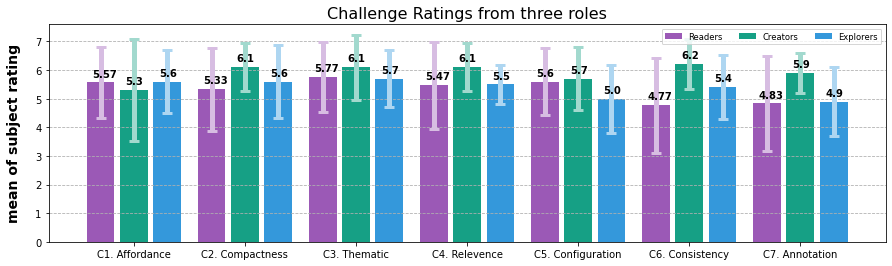

In [159]:
drawBarV(Roles_Ratings, 'mean of subject rating', '', 'Challenge Ratings from three roles',['#9B59B6','#16A085','#3498DB'],['#D7BDE2','#A2D9CE','#AED6F1'])

In [57]:
item = 'C6. Consistency'
creators = Roles_Ratings['Creators'][item]
readers = Roles_Ratings['Readers'][item]
explorers = Roles_Ratings['Explorers'][item]
print(stats.kruskal(readers,creators,explorers))

KruskalResult(statistic=7.127547713359726, pvalue=0.02833170292384707)
